In [7]:
import pandas as pd
import pathlib
import glob
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam
from keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout, Rescaling
from keras.models import Model , Sequential
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory

In [5]:
data_path = "../data/"
data_dir = pathlib.Path(data_path)

In [ ]:
train_ds = image_dataset_from_directory(
    data_dir,validation_split=0.25,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    # shuffle=True,
)
valid_ds = image_dataset_from_directory(
    data_dir,validation_split=0.25,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
# base model
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(33 , activation = 'softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001) , metrics=['accuracy'])

In [ ]:
history = model.fit(ds_train,batch_size=64,epochs=20,validation_data=ds_valid)

Epoch 1/20
117/117 [==============================] - 41s 332ms/step - loss: 3.1944 - accuracy: 0.1185 - val_loss: 2.7133 - val_accuracy: 0.2812
Epoch 2/20
117/117 [==============================] - 9s 74ms/step - loss: 2.6489 - accuracy: 0.2671 - val_loss: 2.5370 - val_accuracy: 0.2986
Epoch 3/20
117/117 [==============================] - 9s 74ms/step - loss: 2.3215 - accuracy: 0.3522 - val_loss: 2.3448 - val_accuracy: 0.3321
Epoch 4/20
117/117 [==============================] - 9s 74ms/step - loss: 2.0691 - accuracy: 0.4251 - val_loss: 2.2179 - val_accuracy: 0.3624
Epoch 5/20
117/117 [==============================] - 9s 74ms/step - loss: 1.9045 - accuracy: 0.4761 - val_loss: 2.0541 - val_accuracy: 0.4065
Epoch 6/20
117/117 [==============================] - 9s 73ms/step - loss: 1.7571 - accuracy: 0.5178 - val_loss: 1.9005 - val_accuracy: 0.4606
Epoch 7/20
117/117 [==============================] - 8s 73ms/step - loss: 1.6257 - accuracy: 0.5576 - val_loss: 1.7907 - val_accuracy: 0.50

In [ ]:
model.evaluate(ds_train), model.evaluate(ds_valid)

39/39 [==============================] - 1s 33ms/step - loss: 0.9411 - accuracy: 0.7879


([0.5141890645027161, 0.8499663472175598],
 [0.9410769939422607, 0.7878788113594055])

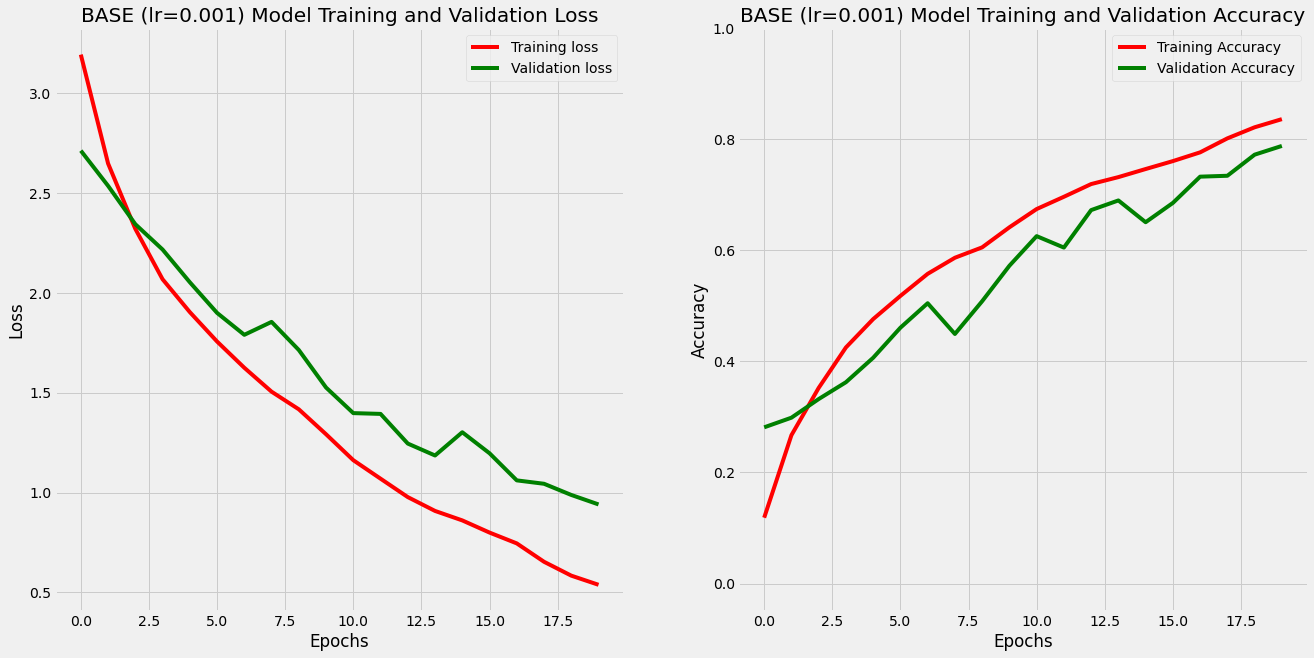

In [ ]:
# visualization
plt.style.use('fivethirtyeight')
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(history.history["loss"], 'r', label='Training loss')
axes[0].plot(history.history["val_loss"],'g',label='Validation loss' )
axes[0].set_title('BASE (lr=0.001) Model Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
plt.ylim(-0.05,1.0)

axes[1].plot (history.history["accuracy"],'r',label= 'Training Accuracy')
axes[1].plot (history.history["val_accuracy"],'g',label= 'Validation Accuracy')
axes[1].set_title('BASE (lr=0.001) Model Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.savefig("/content/drive/MyDrive/프로젝트/BASE(lr=0.001)model_accuracy_loss.jpg")